In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def binomial(n,c,p):
    return (math.factorial(n)/(math.factorial(c)*math.factorial(n-c)))*p**c*(1-p)**(n-c)

def p_value_binomial(n, c, p):
    p_value = 0
    # Sum all probabilities towards the left of c
    for i in range(0, c):
        p_value = p_value + binomial(n, i, p)
    return p_value

def poisson(n,c,p):
    l = n*p
    return np.exp(-l)*l**c/math.factorial(c)

def p_value_poisson(n, c, p):
    p_value = 0
    # Sum all probabilities towards the left of c
    for i in range(0, c):
        p_value = p_value + poisson(n, i, p)
    return p_value

In [3]:
n_list = [10, 20, 30, 50, 100]
#c_list = np.arange(0, 20)
p=0.9
result_binomial = [[p_value_binomial(N, c, p) for c in np.arange(0, N)]for N in n_list]
result_poisson = [[p_value_poisson(N, c, p) for c in np.arange(0, N)]for N in n_list]
dist_binomial = [[binomial(N, c, p) for c in np.arange(0, N)]for N in n_list]
dist_poisson = [[poisson(N, c, p) for c in np.arange(0, N)]for N in n_list]

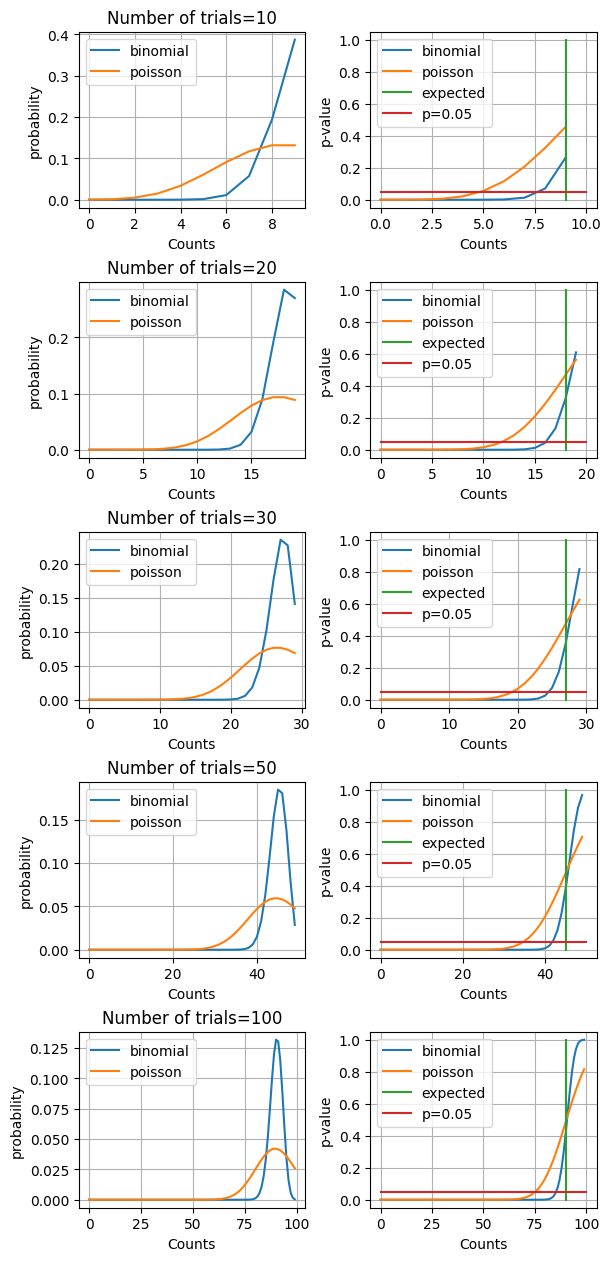

In [5]:
fig, axs = plt.subplots(nrows = len(n_list), ncols = 2, figsize=(6, 2.5*len(n_list)),  layout="constrained")
for i in range(len(n_list)):
    axs[i][0].plot(np.arange(0, n_list[i]), dist_binomial[i], label="binomial")
    axs[i][0].plot(np.arange(0, n_list[i]), dist_poisson[i], label="poisson")
    
    axs[i][1].plot(np.arange(0, n_list[i]), result_binomial[i], label="binomial")
    axs[i][1].plot(np.arange(0, n_list[i]), result_poisson[i], label="poisson")
    axs[i][1].plot([n_list[i]*p, n_list[i]*p], [0,1], label="expected")
    axs[i][1].plot([0, n_list[i]], [0.05,0.05], label="p=0.05")
    
    axs[i][0].set_title(f"Number of trials={n_list[i]}")
    axs[i][0].set_ylabel("probability")
    axs[i][1].set_ylabel("p-value")
    

for ax in axs.flatten():
    ax.legend()
    ax.set_xlabel("Counts")
    ax.grid()

In [6]:
conf = np.array([[91.20, 1.91, 6.31, 0.15, 0.18, 0.25],
   [11.98, 56.69, 12.58, 5.26, 12.37, 1.12],
   [5.99, 2.79, 49.33, 11.15, 22.18, 8.56],
   [3.23, 3.47, 35.09, 13.36, 35.85, 8.99],
   [2.66, 3.91, 28.88, 13.60, 42.07, 8.87],
   [0.59, 0.31, 3.19, 1.13, 2.35, 92.43]])/100

N=20
expected_count = N*conf
standard_dev = np.sqrt(N*conf*(1-conf))
err_down = expected_count - standard_dev
err_up = expected_count + standard_dev

In [9]:
expected_count

array([[18.24 ,  0.382,  1.262,  0.03 ,  0.036,  0.05 ],
       [ 2.396, 11.338,  2.516,  1.052,  2.474,  0.224],
       [ 1.198,  0.558,  9.866,  2.23 ,  4.436,  1.712],
       [ 0.646,  0.694,  7.018,  2.672,  7.17 ,  1.798],
       [ 0.532,  0.782,  5.776,  2.72 ,  8.414,  1.774],
       [ 0.118,  0.062,  0.638,  0.226,  0.47 , 18.486]])

In [8]:
standard_dev

array([[1.26693331, 0.61213054, 1.08736737, 0.17307513, 0.18956582,
        0.22332711],
       [1.4522256 , 2.21596205, 1.48306682, 0.99833101, 1.47240151,
        0.47062852],
       [1.06124446, 0.73649969, 2.23586721, 1.40760612, 1.85798149,
        1.25118056],
       [0.79065429, 0.81848531, 2.13433451, 1.52151924, 2.14465732,
        1.2792028 ],
       [0.71961712, 0.86684705, 2.02679333, 1.53299706, 2.20776588,
        1.27147403],
       [0.34249642, 0.24861175, 0.78590572, 0.47270096, 0.67746218,
        1.18295824]])